In [1]:
## Importing the relevant packages:

import pandas as pd
import numpy as np
import requests
import io
import sys
import os
from ast import literal_eval

import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns

In [2]:
survey_df = pd.read_csv("decision_maker_survey_data.csv")
print(len(survey_df))
survey_df.head()

442


,ResponseId,UserLanguage,consent,employment_status,role_type,misinfo_intro,misinfo_attitudes_general,misinfo_attitudes_companies,misinfo_attitudes_platforms,attitudes_recommend,...,verified_DM,final_exec,final_marketing,final_manager,final_other,appears_on_misinfo,appears_in_MP_data,correct_company_beliefs,follow_up_ad_check_surprise,surprised_by_ad_check
0,R_TwtImxSVd1qRcIh,EN,I AGREE to participate in this study and confi...,Full-time employee,Business and finance specialist (business spe...,I have carefully read the above information.,Strongly agree,Strongly agree,Strongly agree,Strongly agree,...,0,0,0,0,1,0,0,0,NaN,None
1,R_3PRIChFajTvXyKA,EN,I AGREE to participate in this study and confi...,Self-employed or small business owner,"Top executive (e.g. chief executives, general...",I have carefully read the above information.,Agree,Somewhat agree,Agree,Somewhat agree,...,1,1,0,0,0,0,0,1,NaN,None
2,R_2dQPRTL3YmpF5OJ,EN,I AGREE to participate in this study and confi...,Self-employed or small business owner,Operations manager (e.g. managers of administ...,I have carefully read the above information.,Strongly agree,Agree,Strongly agree,Agree,...,0,0,0,1,0,1,1,0,NaN,None
3,R_1LNn1eL3N1gVIrp,EN,I AGREE to participate in this study and confi...,Full-time employee,"Top executive (e.g. chief executives, general...",I have carefully read the above information.,Agree,Agree,Agree,Agree,...,1,1,0,0,0,0,0,1,Unsurprising,0
4,R_11XzapZQcNaDhm9,EN,I AGREE to participate in this study and confi...,Full-time employee,"Manager of advertising, marketing, promotions,...",I have carefully read the above information.,Strongly agree,Strongly agree,Agree,Agree,...,0,0,1,1,0,0,0,1,NaN,None


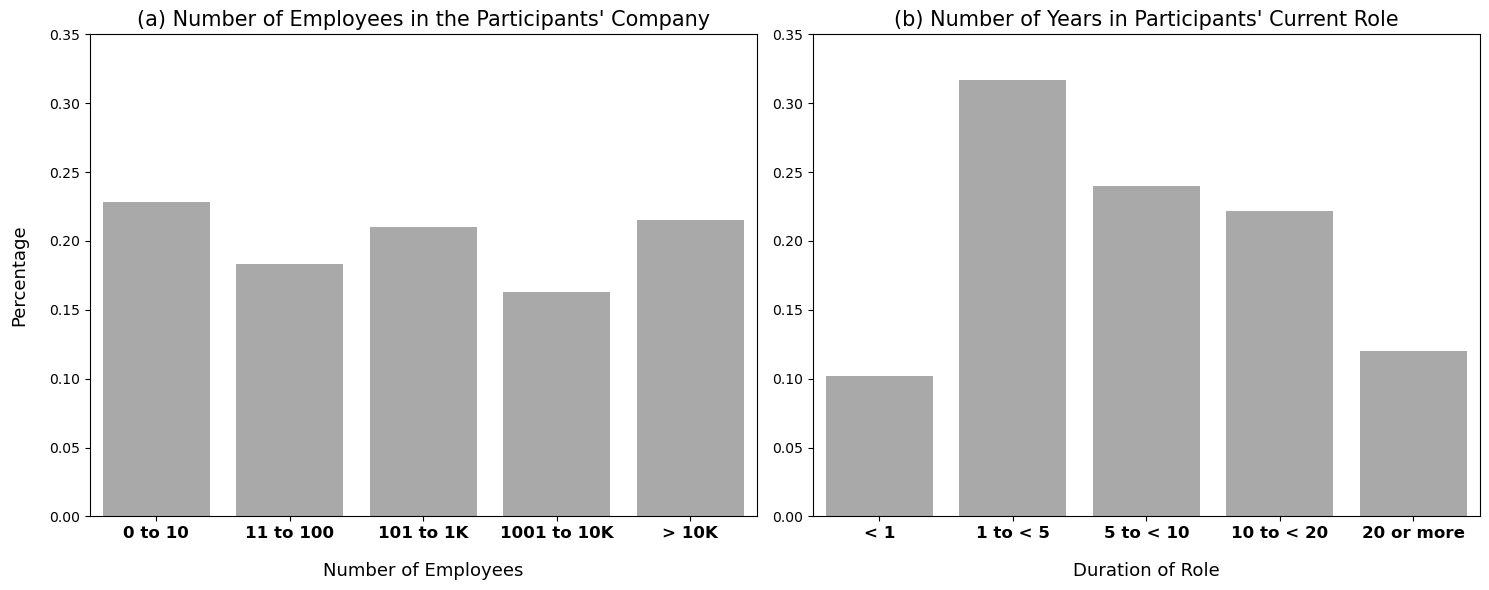

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

# Plot for 'num_employees'
value_counts_num_employees = survey_df['num_employees'].value_counts(normalize=True)
value_counts_num_employees = value_counts_num_employees.rename({'101 to 1000': '101 to 1K', 
                                                                '1001 to 10,000': '1001 to 10K',
                                                                'More than 10,000': '> 10K'})
desired_order_num_employees = ['0 to 10', '11 to 100', '101 to 1K', '1001 to 10K', '> 10K'] 
sns.barplot(x=value_counts_num_employees.index, y=value_counts_num_employees.values, color='darkgray', 
            order=desired_order_num_employees, ax=axes[0])
axes[0].set_title("(a) Number of Employees in the Participants' Company", fontsize = 15) 
axes[0].set_xlabel('Number of Employees', labelpad = 15, fontsize = 13)
axes[0].set_ylabel('Percentage', labelpad = 15, fontsize = 13) 
axes[0].set_xticklabels(axes[0].get_xticklabels(), weight='bold', fontsize = 12) 
axes[0].set_ylim(0, 0.35)  # Set the upper limit of the y-axis 

# Plot for 'duration_of_role'
value_counts_duration_of_role = survey_df['duration_of_role'].value_counts(normalize=True)
value_counts_duration_of_role = value_counts_duration_of_role.rename({'Less than 1 year': '< 1', 
                                                    'Between 1 year to less than 5 years': '1 to < 5', 
                                                    'Between 5 years to less than 10 years': '5 to < 10', 
                                                    'Between 10 years to less than 20 years': '10 to < 20', 
                                                    '20 or more years': '20 or more'})
desired_order_duration_of_role = ['< 1', '1 to < 5', 
                                  '5 to < 10', '10 to < 20', '20 or more']  
sns.barplot(x=value_counts_duration_of_role.index, y=value_counts_duration_of_role.values, color='darkgray', 
            order=desired_order_duration_of_role, ax=axes[1])
axes[1].set_title("(b) Number of Years in Participants' Current Role",  fontsize = 15) 
# Distribution for the Participants' Duration in their Current Role
axes[1].set_xlabel('Duration of Role', labelpad = 15, fontsize = 13)
axes[1].set_xticklabels(axes[1].get_xticklabels(), weight='bold', fontsize = 12)  
axes[1].set_ylim(0, 0.35)  # Set the upper limit of the y-axis 

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()